<h1>Mnist 多层感知器版<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#初始化模型参数" data-toc-modified-id="初始化模型参数-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>初始化模型参数</a></span></li><li><span><a href="#添加隐层" data-toc-modified-id="添加隐层-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>添加隐层</a></span></li><li><span><a href="#定义交叉熵" data-toc-modified-id="定义交叉熵-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>定义交叉熵</a></span></li><li><span><a href="#设置随机梯度下降" data-toc-modified-id="设置随机梯度下降-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>设置随机梯度下降</a></span></li><li><span><a href="#初始化所有参数" data-toc-modified-id="初始化所有参数-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>初始化所有参数</a></span></li><li><span><a href="#进行train" data-toc-modified-id="进行train-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>进行train</a></span></li><li><span><a href="#评价" data-toc-modified-id="评价-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>评价</a></span></li><li><span><a href="#多层隐层" data-toc-modified-id="多层隐层-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>多层隐层</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>结论</a></span></li></ul></div>

## 导入工具包

In [1]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None


## 导入数据

In [2]:
# Import data
data_dir = 'E:/AI/00/data/Mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting E:/AI/00/data/Mnist/input_data\train-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\train-labels-idx1-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-labels-idx1-ubyte.gz


## 初始化模型参数

In [3]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.random_normal([784,100],stddev=0.1,seed=66))
#用一个较小的正数来初始化偏置项, 
#[784,100]中的100是隐层权重矩阵的列数,大小随意
#[784,100]中的784是为了与x中的[None,784]保持一致
b1 = tf.Variable(tf.zeros([100]))
#[100]同[784,100]中的100保持一致
W2 = tf.Variable(tf.zeros([100, 10]))
#[100,10]中的100同[784,100]中的100保持一致
#[100,10]中的10同最终输出10中的10保持一致
b2 = tf.Variable(tf.zeros([10]))
#[10]同[100,10]中的10保持一致

## 添加隐层

In [4]:
# Define loss and optimizer
hidden1=tf.nn.sigmoid(tf.matmul(x,W1)+b1)  #这里使用传统的Sigmoid非线性激活函数
y = tf.matmul(hidden1, W2) + b2
y_ = tf.placeholder(tf.float32, [None, 10])

## 定义交叉熵

In [5]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

## 设置随机梯度下降

In [6]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## 初始化所有参数

In [7]:
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

## 进行train

In [8]:
# Train
acc=dict()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for _ in range(20000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        acc[_]=sess.run(accuracy, feed_dict={x: mnist.test.images,
                                    y_: mnist.test.labels})


验证我们模型在测试数据上的准确率

## 评价

In [9]:
import matplotlib.pyplot as plt
del(acc[0])
plt.plot(acc.keys(),acc.values())
plt.show()

<Figure size 640x480 with 1 Axes>

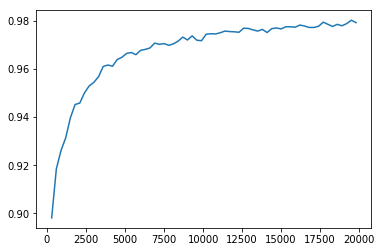

In [18]:
plt.plot(acc.keys(),acc.values())
plt.show()

In [19]:
acc

{300: 0.8981,
 600: 0.9185,
 900: 0.9261,
 1200: 0.9314,
 1500: 0.9397,
 1800: 0.9452,
 2100: 0.9458,
 2400: 0.95,
 2700: 0.9529,
 3000: 0.9544,
 3300: 0.9567,
 3600: 0.961,
 3900: 0.9616,
 4200: 0.9611,
 4500: 0.9639,
 4800: 0.9648,
 5100: 0.9664,
 5400: 0.9668,
 5700: 0.9659,
 6000: 0.9677,
 6300: 0.9681,
 6600: 0.9687,
 6900: 0.9707,
 7200: 0.9702,
 7500: 0.9705,
 7800: 0.9698,
 8100: 0.9704,
 8400: 0.9715,
 8700: 0.9732,
 9000: 0.972,
 9300: 0.9737,
 9600: 0.9719,
 9900: 0.9717,
 10200: 0.9744,
 10500: 0.9746,
 10800: 0.9745,
 11100: 0.975,
 11400: 0.9757,
 11700: 0.9755,
 12000: 0.9754,
 12300: 0.9752,
 12600: 0.9769,
 12900: 0.9768,
 13200: 0.9762,
 13500: 0.9757,
 13800: 0.9764,
 14100: 0.9751,
 14400: 0.9767,
 14700: 0.977,
 15000: 0.9766,
 15300: 0.9775,
 15600: 0.9775,
 15900: 0.9773,
 16200: 0.9782,
 16500: 0.9778,
 16800: 0.9772,
 17100: 0.9772,
 17400: 0.9777,
 17700: 0.9794,
 18000: 0.9785,
 18300: 0.9776,
 18600: 0.9785,
 18900: 0.9779,
 19200: 0.9788,
 19500: 0.9802,
 1

毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层`一层隐层后95%`
- 激活函数
- 正则化
- 初始化
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

## 多层隐层

In [10]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.truncated_normal([784,100],stddev=0.1))
b1 = tf.Variable(tf.zeros([100]))
W2 = tf.Variable(tf.truncated_normal([100,100],stddev=0.1))
b2 = tf.Variable(tf.zeros([100]))
W3 = tf.Variable(tf.truncated_normal([100,100],stddev=0.1))
b3 = tf.Variable(tf.zeros([100]))
W4 = tf.Variable(tf.truncated_normal([100,100],stddev=0.1))
b4 = tf.Variable(tf.zeros([100]))
W5 = tf.Variable(tf.zeros([100, 10]))
b5 = tf.Variable(tf.zeros([10]))

In [11]:
# 添加隐层
hidden1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.relu(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
hidden4 = tf.nn.tanh(tf.matmul(hidden3,W4)+b4)
y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [12]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

In [13]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [14]:
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [15]:
# Train
for _ in range(3000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [16]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

0.9698


四层隐层之后,正确率达到96%

## 结论

应当加隐层